In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# importing the dataset
df=pd.read_csv('clean1.csv')

# sanity check
df.sample(5)

,vin,body_type,daysonmarket,engine_cylinders,engine_displacement,engine_type,exterior_color,frame_damaged,fuel_tank_volume,fuel_type,...,mileage,model_name,owner_count,price,seller_rating,torque,transmission,transmission_display,wheel_system,year
96844,4S4BP61C787363054,Wagon,53,H4,2500.000,H4,Gray,False,16.9 gal,Gasoline,...,132362.000,Outback,2.000,5995.000,4.133,"170 lb-ft @ 4,400 RPM",A,Automatic,AWD,2008
57800,YV1622FS2C2125805,Sedan,43,I5,2500.000,I5,White,False,17.8 gal,Gasoline,...,85777.000,S60,1.000,9479.000,4.462,"266 lb-ft @ 1,800 RPM",A,6-Speed Automatic,FWD,2012
27168,1C6RR7FT9ES180928,Pickup Truck,16,NaN,5700.000,NaN,Black Clearcoat,False,26 gal,NaN,...,84770.000,1500,1.000,21995.000,4.545,"407 lb-ft @ 3,950 RPM",A,Automatic,4WD,2014
64245,WDDSJ4EB3EN039429,Sedan,52,I4,2000.000,I4,White,False,14.5 gal,Gasoline,...,84650.000,CLA-Class,1.000,16995.000,3.853,"258 lb-ft @ 1,250 RPM",A,Automatic,FWD,2014
47186,1GNKVJKD5EJ330984,SUV / Crossover,239,V6,3600.000,V6,Cyber Gray Metallic,False,22 gal,Gasoline,...,84077.000,Traverse,2.000,16914.000,3.687,"270 lb-ft @ 3,400 RPM",A,Automatic,AWD,2014


In [ ]:
# Package imports
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline

In [ ]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 99998 rows and 26 columns


# New section

In [ ]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   99998 non-null  object 
 1   body_type             99597 non-null  object 
 2   daysonmarket          99998 non-null  int64  
 3   engine_cylinders      97000 non-null  object 
 4   engine_displacement   94659 non-null  float64
 5   engine_type           97000 non-null  object 
 6   exterior_color        99998 non-null  object 
 7   frame_damaged         56925 non-null  object 
 8   fuel_tank_volume      95044 non-null  object 
 9   fuel_type             97539 non-null  object 
 10  has_accidents         56925 non-null  object 
 11  horsepower            94659 non-null  float64
 12  is_new                99998 non-null  bool   
 13  major_options         93514 non-null  object 
 14  make_name             99998 non-null  object 
 15  maximum_seating    

In [ ]:
# checking for duplicate rows
duplucate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplucate_rows}.")

The number of duplicate rows are 0.


In [ ]:
# sanity check
df.shape

(99998, 26)

In [ ]:
# checking for the total amount of null values
df.isnull().sum()

vin                         0
body_type                 401
daysonmarket                0
engine_cylinders         2998
engine_displacement      5339
engine_type              2998
exterior_color              0
frame_damaged           43073
fuel_tank_volume         4954
fuel_type                2459
has_accidents           43073
horsepower               5339
is_new                      0
major_options            6484
make_name                   0
maximum_seating          4954
mileage                  3556
model_name                  0
owner_count             45720
price                       0
seller_rating             642
torque                  15349
transmission             1001
transmission_display     1001
wheel_system             4624
year                        0
dtype: int64

In [ ]:
# checking for the total amount of null values as a percentage.
df.isna().sum()/df.shape[0]*100

vin                     0.000
body_type               0.401
daysonmarket            0.000
engine_cylinders        2.998
engine_displacement     5.339
engine_type             2.998
exterior_color          0.000
frame_damaged          43.074
fuel_tank_volume        4.954
fuel_type               2.459
has_accidents          43.074
horsepower              5.339
is_new                  0.000
major_options           6.484
make_name               0.000
maximum_seating         4.954
mileage                 3.556
model_name              0.000
owner_count            45.721
price                   0.000
seller_rating           0.642
torque                 15.349
transmission            1.001
transmission_display    1.001
wheel_system            4.624
year                    0.000
dtype: float64

In [ ]:
# Delete columns containing more than 50% null values
percentage = 50
min_count =  int(((100-percentage)/100)*df.shape[0] + 1)
cars_df = df.dropna(axis=1, thresh=min_count)

print(f"The columns with {percentage}% or more null values are: {df.columns[df.isna().sum()/df.shape[0]*100 > percentage]}")
print(f"The new shape of the dataframe is {cars_df.shape[0]} rows and {cars_df.shape[1]} columns.")

The columns with 50% or more null values are: Index([], dtype='object')
The new shape of the dataframe is 99998 rows and 26 columns.


In [ ]:
# checking how many null values are in the dataframe that are over 0%
percentage = cars_df.isna().sum()/cars_df.shape[0]*100

pd.DataFrame(percentage[percentage > 0])

,0
body_type,0.401
engine_cylinders,2.998
engine_displacement,5.339
engine_type,2.998
frame_damaged,43.074
fuel_tank_volume,4.954
fuel_type,2.459
has_accidents,43.074
horsepower,5.339
major_options,6.484


In [ ]:
# creating a copy of the dataframe
cars_df2 = cars_df.copy()

In [ ]:
# checking for the total amount of null values as a percentage.
percentage = cars_df2['body_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the body_type column are {percentage.round(2)}%.")

The amount of null values in the body_type column are 0.4%.


In [ ]:
# checking the body_type column for the most common body type
cars_df2['body_type'].value_counts()/cars_df2['body_type'].shape*100

SUV / Crossover   52.652
Sedan             26.920
Pickup Truck       8.908
Hatchback          2.599
Coupe              2.262
Van                2.133
Minivan            1.812
Wagon              1.401
Convertible        0.912
Name: body_type, dtype: float64

In [ ]:
#checking the rows of the null values in the body_type column
cars_df2.loc[:,['body_type','make_name','model_name']][cars_df2['body_type'].isna()]

,body_type,make_name,model_name
851,NaN,Kia,K5
857,NaN,Kia,K5
865,NaN,Kia,K5
896,NaN,Kia,K5
1079,NaN,Kia,K5
...,...,...,...
98799,NaN,BMW,X3 M
98825,NaN,RAM,5500 Chassis
98854,NaN,BMW,X7
98892,NaN,BMW,M8


In [ ]:
# replacing null values with the most common body type
cars_df2['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)

# checking for nulls
result = cars_df2['body_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the body_type column are {result.round(2)}%.")

The amount of null values in the body_type column are 0.0%.


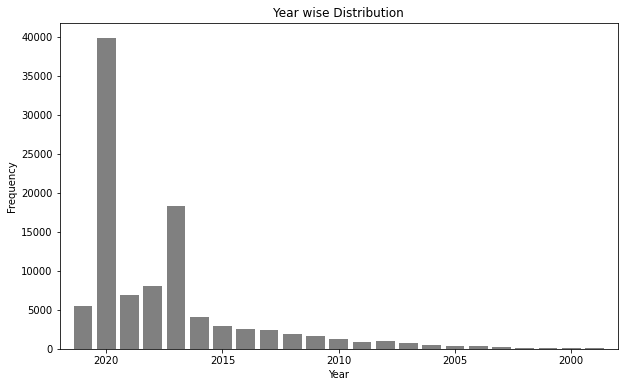

In [ ]:
# plotting the distribution of the body_type column
plt.figure(figsize=(10,6))
plt.bar(cars_df2['year'].value_counts().index, cars_df2['year'].value_counts(),
        color=['grey'])
plt.xlim(2022,1998)
plt.title('Year wise Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

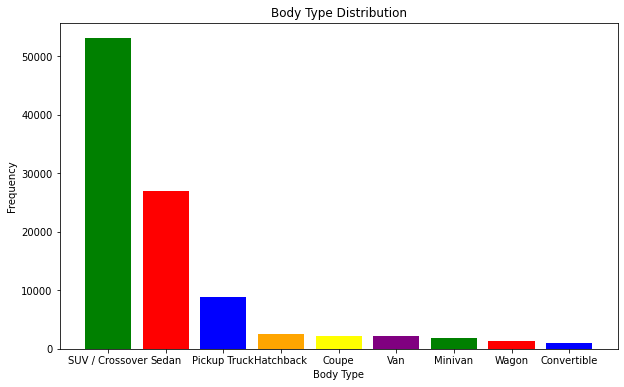

In [ ]:
# plotting the distribution of the body_type column
plt.figure(figsize=(10,6))
plt.bar(cars_df2['body_type'].value_counts().index, cars_df2['body_type'].value_counts(),
        color=['green','red','blue','orange','yellow','purple'])
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking how many null values are in the column
percentage = cars_df2['engine_cylinders'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the engine_cylinders column are {percentage.round(2)}%.")

The amount of null values in the engine_cylinders column are 3.0%.


In [ ]:
# checking the value counts of the column.
pd.DataFrame(cars_df2['engine_cylinders'].value_counts()/cars_df2.shape[0]*100)

,engine_cylinders
I4,51.050
V6,25.248
V8,7.029
H4,3.139
I6,1.873
I4 Hybrid,1.701
I3,1.649
V6 Flex Fuel Vehicle,1.557
V8 Flex Fuel Vehicle,1.506
I4 Diesel,0.299


In [ ]:
# dropping the column since it matches with engine type
cars_df2 = cars_df2.drop(['engine_cylinders'], axis=1)

In [ ]:
# dropping the column, redundant info
cars_df2 = cars_df2.drop(['engine_displacement'], axis=1)

In [ ]:
# checking how many null values are in the column
percentage = cars_df2['exterior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 0.0%.


In [ ]:

# checking the value counts of the column.
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

Black                  7.039
White                  4.418
Gray                   3.145
Silver                 2.259
Summit White           2.069
                        ... 
Antique Sage Pearl     0.001
GN WHITE GOLD METALL   0.001
N1 BLUE JEANS METALL   0.001
JX_LEAD_FOOT           0.001
Power Blue Metallic    0.001
Name: exterior_color, Length: 4294, dtype: float64

In [ ]:
# replacing null values with Black.
cars_df2['exterior_color'].fillna("Black", inplace=True)

# checking result
result = cars_df2['exterior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


In [ ]:
# making a list of the top exterior colors
colors = ['White', 'Black', 'Gray', 'Silver',
          'Red', 'Blue', 'Brown', 'Green', 'Beige',
          'Orange', 'Gold', 'Yellow', 'Purple']

# extracting the top exterior colors from the exterior_color column
cars_df2['exterior_color'] = cars_df2['exterior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [ ]:
# checking the results
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

                23.361
Black           21.900
White           19.963
Silver          10.238
Blue             8.372
Gray             8.073
Red              5.830
Green            0.772
Brown            0.338
Orange           0.329
Gold             0.204
Yellow           0.139
Beige            0.129
Gold, White      0.099
Silver, White    0.037
Purple           0.031
Black, White     0.028
Gray, Silver     0.022
Black, Silver    0.016
Gray, Black      0.015
Green, Black     0.013
Blue, White      0.012
Blue, Silver     0.012
Gray, White      0.011
Blue, Black      0.011
Blue, Gray       0.008
Red, Black       0.007
Red, Gray        0.004
Yellow, Black    0.003
Red, Silver      0.002
Orange, Black    0.002
Yellow, Gold     0.002
Brown, Black     0.002
Purple, Black    0.001
Green, Silver    0.001
Blue, Gold       0.001
Gray, Brown      0.001
Orange, White    0.001
Red, White       0.001
Gray, Yellow     0.001
Green, White     0.001
Orange, Gray     0.001
Silver, Black    0.001
Green, Gray

In [ ]:
# checking the number of unique values in the exterior_color column
cars_df2['exterior_color'].nunique()

46

In [ ]:
# replacing null values with 'Other Color'.
cars_df2['exterior_color'].replace("", "Other Color", inplace=True)

# masking rows with more than one color
mask = cars_df2['exterior_color'].map(cars_df2['exterior_color'].value_counts()) < 4424

# labeling the rows with more than one color as 'Mixed Colors'
cars_df2['exterior_color'] =  cars_df2['exterior_color'].mask(mask, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

Other Color    23.361
Black          21.900
White          19.963
Silver         10.238
Blue            8.372
Gray            8.073
Red             5.830
Mixed Colors    2.261
Name: exterior_color, dtype: float64

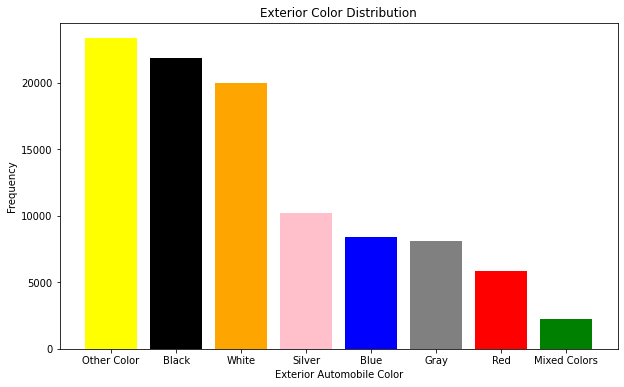

In [ ]:
# plotting the distribution of the body_type column
plt.figure(figsize=(10,6))
plt.bar(cars_df2['exterior_color'].value_counts().index, cars_df2['exterior_color'].value_counts(),
        color=['yellow','black','orange','pink','blue','gray','red','green'])
plt.title('Exterior Color Distribution')
plt.xlabel('Exterior Automobile Color')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking how many null values are in the column
percentage = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 4.95%.


In [ ]:
# checking the value counts of the column.
cars_df2['fuel_tank_volume'].value_counts()/cars_df2.shape[0]*100

18.5 gal   5.579
13.2 gal   4.978
15.9 gal   4.417
26 gal     4.274
14 gal     4.197
            ... 
7.7 gal    0.001
29.1 gal   0.001
20.2 gal   0.001
10.3 gal   0.001
23.9 gal   0.001
Name: fuel_tank_volume, Length: 160, dtype: float64

In [ ]:
# filtering the rows that the fuel_type column is "Electric", with the fuel_tank_volume column.
cars_df2.loc[(cars_df2['fuel_type'] == "Electric"), ['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
274,NaN,Electric
1182,NaN,Electric
1721,NaN,Electric
1729,NaN,Electric
2351,NaN,Electric
...,...,...
98000,NaN,Electric
98241,NaN,Electric
98256,NaN,Electric
98342,NaN,Electric


In [ ]:
# splitting the column and returning the first value
cars_df2['fuel_tank_volume'] = cars_df2['fuel_tank_volume'].str.split(' ').str[0]

# replacing "--" with np.nan
cars_df2['fuel_tank_volume'].replace("--", np.nan , inplace=True)

# converting the fuel_tank_volume column to a float
cars_df2['fuel_tank_volume'] = pd.to_numeric(cars_df2['fuel_tank_volume'], downcast='float')

In [ ]:
# filling the null values with the 0 value on electric cars only.
cars_df2.loc[(cars_df2['fuel_type'] == "Electric"), 'fuel_tank_volume'] = 0

# checking the result
result = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 4.55%.


In [ ]:
# checking the null values rows
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
50,NaN,NaN
162,NaN,Gasoline
263,NaN,Gasoline
303,NaN,NaN
394,NaN,Gasoline
...,...,...
99886,NaN,Gasoline
99897,NaN,Gasoline
99910,NaN,Gasoline
99961,NaN,Gasoline


In [ ]:
# filling the null values with the mean based on the fuel_type column.
cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
result = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 1.74%.


In [ ]:
# checking the null values rows
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
50,NaN,NaN
303,NaN,NaN
1011,NaN,NaN
1124,NaN,NaN
1284,NaN,NaN
...,...,...
99291,NaN,NaN
99437,NaN,NaN
99438,NaN,NaN
99673,NaN,NaN


In [ ]:
# checking how many null values are in the column
percent = cars_df2['fuel_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percent.round(2)}%.")

The amount of null values in the fuel_type column are 2.46%.


In [ ]:
# checking the value counts of the column.
cars_df2['fuel_type'].value_counts()/cars_df2.shape[0]*100

Gasoline                 90.609
Flex Fuel Vehicle         3.256
Hybrid                    1.849
Diesel                    1.017
Electric                  0.457
Biodiesel                 0.352
Compressed Natural Gas    0.001
Name: fuel_type, dtype: float64

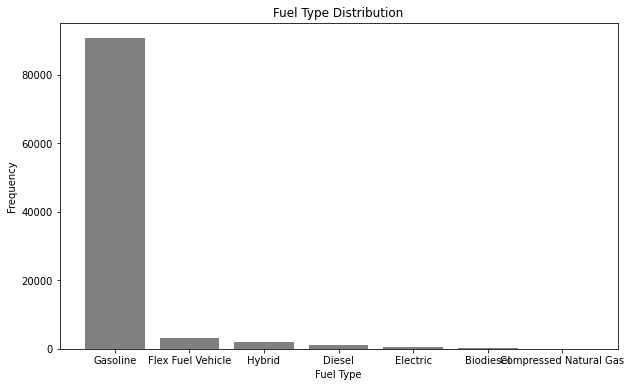

In [ ]:
# plotting the distribution of the body_type column
plt.figure(figsize=(10,6))
plt.bar(cars_df2['fuel_type'].value_counts().index, cars_df2['fuel_type'].value_counts(),
        color=['grey'])
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()

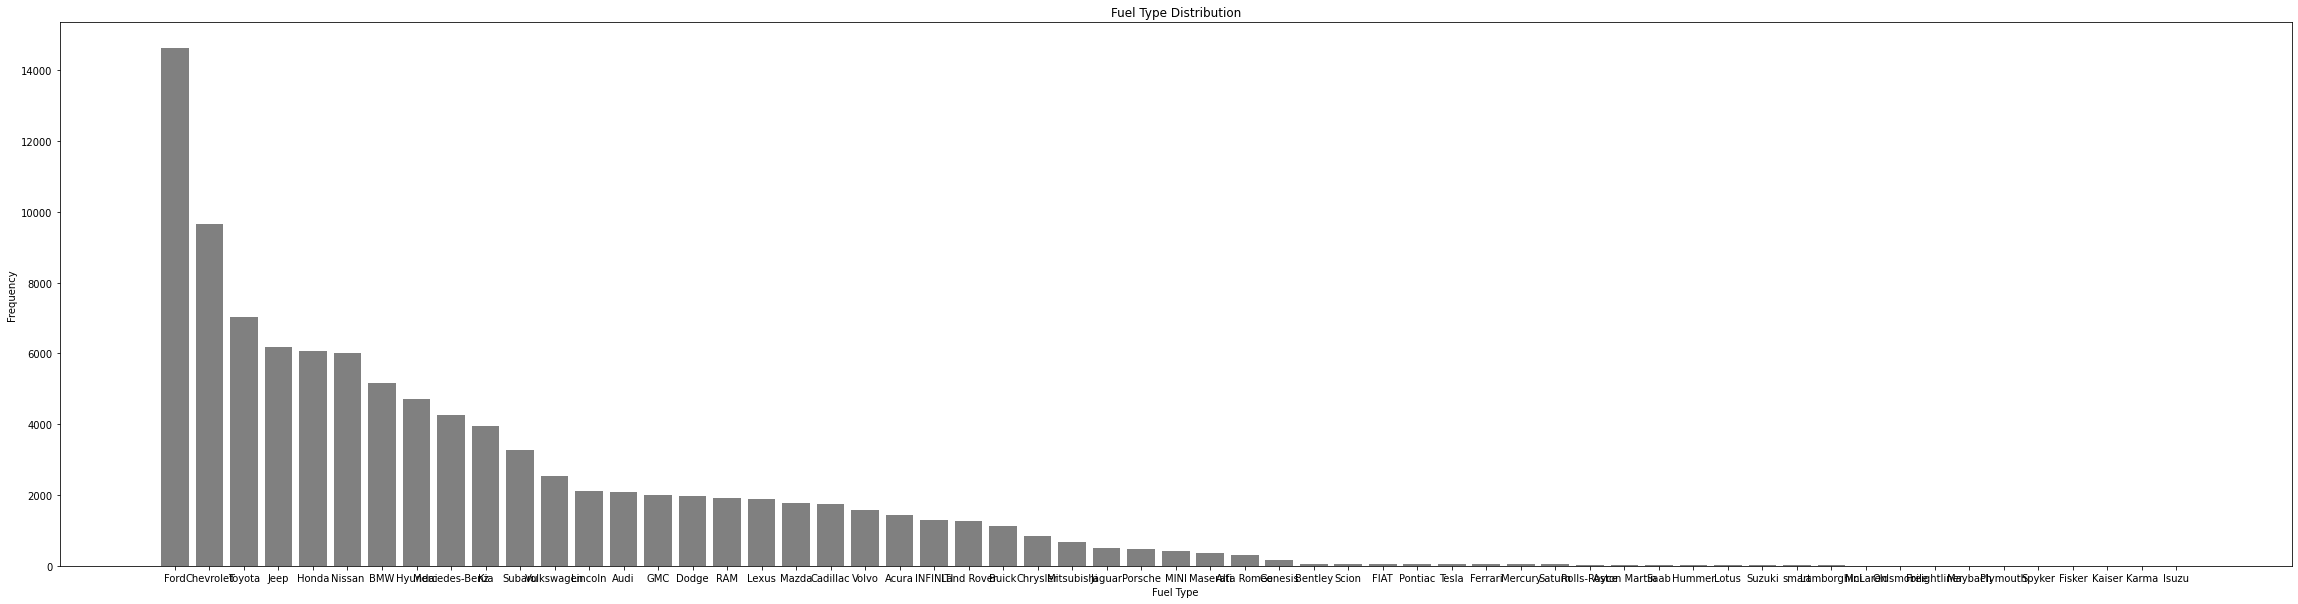

In [ ]:
plt.figure(figsize=(40,10))
plt.bar(cars_df2['make_name'].value_counts().index, cars_df2['make_name'].value_counts(),
        color=['grey'])
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking the null values rows
cars_df2[cars_df2['fuel_type'].isna()][['fuel_type','fuel_tank_volume','engine_type','make_name','model_name']]

,fuel_type,fuel_tank_volume,engine_type,make_name,model_name
42,NaN,12.700,NaN,Jeep,Renegade
50,NaN,NaN,NaN,Subaru,Impreza
61,NaN,16.900,NaN,Chrysler,200
112,NaN,24.600,NaN,Jeep,Grand Cherokee
217,NaN,26.000,NaN,RAM,1500
...,...,...,...,...,...
99752,NaN,10.600,NaN,Honda,Fit
99759,NaN,10.600,NaN,Honda,Fit
99787,NaN,10.600,NaN,Honda,Fit
99788,NaN,10.600,NaN,Honda,Fit


In [ ]:
# filling the null values with "Gasoline".
cars_df2['fuel_type'].fillna("Gasoline", inplace=True)

# checking the result
percentage = cars_df2['fuel_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percentage.round(2)}%.")

The amount of null values in the fuel_type column are 0.0%.


In [ ]:
# checking the null values rows in the fuel_tank_volume column
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
50,NaN,Gasoline
303,NaN,Gasoline
1011,NaN,Gasoline
1124,NaN,Gasoline
1284,NaN,Gasoline
...,...,...
99291,NaN,Gasoline
99437,NaN,Gasoline
99438,NaN,Gasoline
99673,NaN,Gasoline


In [ ]:
# filling the null values with the mean based on the fuel_tank_volume column.
cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
percentage = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 0.0%.


In [ ]:
percentage = cars_df2['engine_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the engine_type column are {percentage.round(2)}%.")

The amount of null values in the engine_type column are 3.0%.


In [ ]:
# checking the unique values in the engine_type column
cars_df2['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', 'V6 Diesel', nan, 'V8', 'V8 Biodiesel',
       'V8 Flex Fuel Vehicle', 'V6 Flex Fuel Vehicle', 'I4 Hybrid',
       'V6 Hybrid', 'I3', 'I5', 'I4 Flex Fuel Vehicle', 'I4 Diesel',
       'I6 Diesel', 'V8 Diesel', 'R2', 'W12', 'V10', 'V12',
       'V6 Biodiesel', 'H6', 'I2', 'W12 Flex Fuel Vehicle',
       'I5 Biodiesel', 'V8 Hybrid', 'H4 Hybrid',
       'V8 Compressed Natural Gas'], dtype=object)

In [ ]:
# checking the value counts of the column.
cars_df2['engine_type'].value_counts()/cars_df2.shape[0]*100

I4                          51.050
V6                          25.248
V8                           7.029
H4                           3.139
I6                           1.873
I4 Hybrid                    1.701
I3                           1.649
V6 Flex Fuel Vehicle         1.557
V8 Flex Fuel Vehicle         1.506
I4 Diesel                    0.299
V6 Diesel                    0.297
V8 Biodiesel                 0.295
I5                           0.243
I6 Diesel                    0.239
H6                           0.190
I4 Flex Fuel Vehicle         0.188
V6 Hybrid                    0.139
V8 Diesel                    0.107
V12                          0.073
V6 Biodiesel                 0.054
V10                          0.051
W12                          0.034
I2                           0.020
W12 Flex Fuel Vehicle        0.005
H4 Hybrid                    0.005
V8 Hybrid                    0.004
R2                           0.003
I5 Biodiesel                 0.003
V8 Compressed Natura

In [ ]:
# selecting the first string in the engine_type column
cars_df2['engine_type'] = cars_df2['engine_type'].str.split(' ').str[0]

# checking the unique values in the engine_type column
cars_df2['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', nan, 'V8', 'I3', 'I5', 'R2', 'W12', 'V10',
       'V12', 'H6', 'I2'], dtype=object)

In [ ]:
# looking at the null rows
cars_df2.loc[cars_df2['engine_type'].isna(),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
42,Jeep,Renegade,NaN,Gasoline
50,Subaru,Impreza,NaN,Gasoline
61,Chrysler,200,NaN,Gasoline
112,Jeep,Grand Cherokee,NaN,Gasoline
217,RAM,1500,NaN,Gasoline
...,...,...,...,...
99752,Honda,Fit,NaN,Gasoline
99759,Honda,Fit,NaN,Gasoline
99787,Honda,Fit,NaN,Gasoline
99788,Honda,Fit,NaN,Gasoline


In [ ]:
# looking at the null rows that the fuel_type column is "Electric"
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Electric"),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
274,Kia,Soul EV,NaN,Electric
1182,Kia,Niro EV,NaN,Electric
1721,Chevrolet,Bolt EV,NaN,Electric
1729,Chevrolet,Bolt EV,NaN,Electric
2351,Hyundai,Ioniq Electric,NaN,Electric
...,...,...,...,...
98000,Chevrolet,Bolt EV,NaN,Electric
98241,Audi,e-tron,NaN,Electric
98256,Audi,e-tron,NaN,Electric
98342,Audi,e-tron,NaN,Electric


In [ ]:
# filling the null values with the fuel_type "Electric" with the "Electric Motor" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Electric"), 'engine_type'] = "Electric Motor"

In [ ]:
# filling the null values with the fuel_type "Gasoline" with the "I4" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Gasoline"), 'engine_type'] = "Gasoline engine"

In [ ]:
# checking for nulls
result = cars_df2['engine_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the engine_type column are {result}%.")

The amount of null values in the engine_type column are 0.0750015000300006%.


In [ ]:
# checking the null values rows in the engine_type column
cars_df2[cars_df2['engine_type'].isna()][['engine_type','fuel_type']]

,engine_type,fuel_type
7186,NaN,Diesel
7264,NaN,Diesel
8259,NaN,Diesel
10489,NaN,Diesel
10503,NaN,Diesel
...,...,...
85232,NaN,Diesel
85238,NaN,Diesel
85276,NaN,Diesel
98090,NaN,Diesel


In [ ]:
# filling the null values with the fuel_type "Diesel" with the "Diesel" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Diesel"), 'engine_type'] = "Diesel engine"

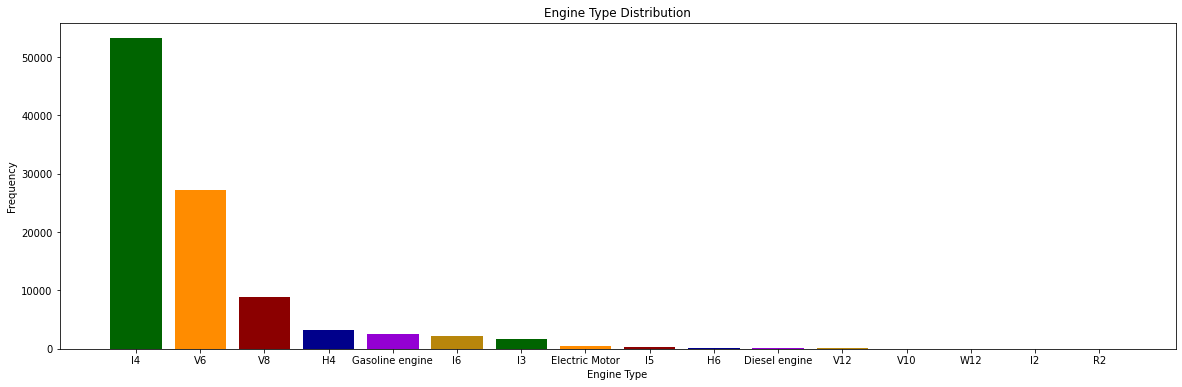

In [ ]:
# plotting the distribution of the engine_type column
plt.figure(figsize=(20,6))
plt.bar(cars_df2['engine_type'].value_counts().index, cars_df2['engine_type'].value_counts(),
        color=['darkgreen','darkorange','darkred','darkblue','darkviolet','darkgoldenrod'])
plt.title('Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking how many null values are in the column
percentage = cars_df2['horsepower'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 5.34%.


In [ ]:
# checking the value counts of the column.
cars_df2['horsepower'].value_counts()/cars_df2.shape[0]*100

170.000   4.933
295.000   3.145
180.000   2.589
300.000   2.391
250.000   2.195
           ... 
621.000   0.001
111.000   0.001
652.000   0.001
536.000   0.001
502.000   0.001
Name: horsepower, Length: 392, dtype: float64

In [ ]:
# filling the null values with the most common value, since for average it will go down for NULL values
cars_df2['horsepower'].fillna(cars_df2['horsepower'].mode()[0], inplace=True)

# checking the result
percentage = cars_df2['horsepower'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 0.0%.


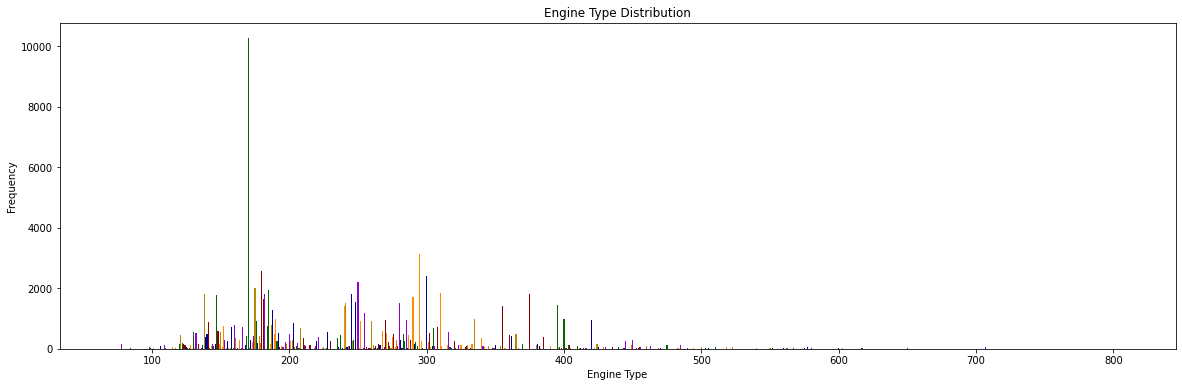

In [ ]:
# plotting the distribution of the engine_type column
plt.figure(figsize=(20,6))
plt.bar(cars_df2['horsepower'].value_counts().index, cars_df2['horsepower'].value_counts(),
        color=['darkgreen','darkorange','darkred','darkblue','darkviolet','darkgoldenrod'])
plt.title('Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking how many null values are in the column
percentage = cars_df2['maximum_seating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {percentage.round(2)}%.")

The amount of null values in the maximum_seating column are 4.95%.


In [ ]:
# checking the value_counts of the column
cars_df2['maximum_seating'].value_counts()/cars_df2.shape[0]*100

5 seats    67.647
7 seats    10.834
6 seats     5.850
8 seats     5.225
4 seats     2.716
2 seats     1.517
3 seats     0.891
15 seats    0.205
9 seats     0.066
12 seats    0.061
--          0.022
10 seats    0.011
Name: maximum_seating, dtype: float64

In [ ]:
# checking the unique values of the column
cars_df2['maximum_seating'].unique()

array(['5 seats', '7 seats', '2 seats', '4 seats', '8 seats', nan,
       '6 seats', '9 seats', '3 seats', '--', '15 seats', '12 seats',
       '10 seats'], dtype=object)

In [ ]:
# replacing the "--" with np.nan
cars_df2['maximum_seating'].replace("--", np.nan , inplace=True)

# filling the null values with a new value called the most frequent value.
cars_df2['maximum_seating'].fillna("5 seats", inplace=True)

# checking the result
result = cars_df2['maximum_seating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {result.round(2)}%.")

The amount of null values in the maximum_seating column are 0.0%.


In [ ]:
# removing the " seats" from the column
cars_df2['maximum_seating'] = cars_df2['maximum_seating'].str.replace(" seats", "")

# converting the column to a int
cars_df2['maximum_seating'] = pd.to_numeric(cars_df2['maximum_seating'], downcast='integer')

# checking the result
cars_df2['maximum_seating'].value_counts()

5     72622
7     10834
6      5850
8      5225
4      2716
2      1517
3       891
15      205
9        66
12       61
10       11
Name: maximum_seating, dtype: int64

In [ ]:
# checking how many null values are in the column
percentage = cars_df2['mileage'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the mileage column are {percentage.round(2)}%.")

The amount of null values in the mileage column are 3.56%.


In [ ]:
# checking the value counts
cars_df2['mileage'].value_counts()/cars_df2.shape[0]*100

0.000       9.758
10.000      4.505
5.000       3.857
3.000       3.111
1.000       2.301
             ... 
3274.000    0.001
44919.000   0.001
46061.000   0.001
19636.000   0.001
39600.000   0.001
Name: mileage, Length: 43418, dtype: float64

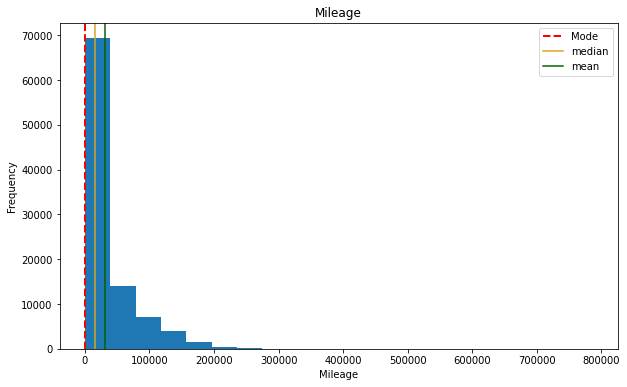

In [ ]:
# plotting the mileage column to see the distribution
plt.figure(figsize=(10,6))
plt.hist(cars_df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

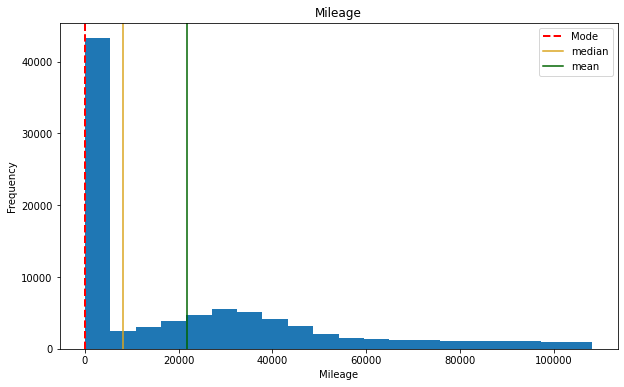

In [ ]:
# using the interquartile range to remove outliers
q1 = cars_df2['mileage'].quantile(0.25)
q3 = cars_df2['mileage'].quantile(0.75)

# calculating the interquartile range
iqr = q3 - q1

# removing outliers
cars_df2 = cars_df2[(cars_df2['mileage'] >= q1 - 1.5*iqr) & (cars_df2['mileage'] <= q3 + 1.5*iqr)]

# checking the result
plt.figure(figsize=(10,6))
plt.hist(cars_df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# filling the null values with the mean of the column
cars_df2['mileage'].fillna(cars_df2['mileage'].mean(), inplace=True)

# checking the result
result = cars_df2['mileage'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the mileage column are {result.round(2)}%.")

The amount of null values in the mileage column are 0.0%.


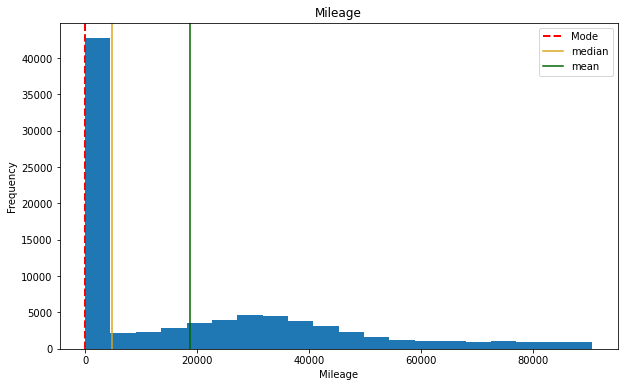

In [ ]:
# using the interquartile range to remove outliers
q1 = cars_df2['mileage'].quantile(0.25)
q3 = cars_df2['mileage'].quantile(0.75)

# calculating the interquartile range
iqr = q3 - q1

# removing outliers
cars_df2 = cars_df2[(cars_df2['mileage'] >= q1 - 1.5*iqr) & (cars_df2['mileage'] <= q3 + 1.5*iqr)]

# checking the result
plt.figure(figsize=(10,6))
plt.hist(cars_df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking the number of null values in the column
percentage = cars_df2['seller_rating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the seller_rating column are {percentage.round(2)}%.")

The amount of null values in the seller_rating column are 0.59%.


In [ ]:
# checking the value_counts of the column
cars_df2['seller_rating'].value_counts()/cars_df2.shape[0]*100

4.500   4.340
5.000   2.823
4.000   2.781
4.333   2.065
4.750   1.799
         ... 
4.412   0.001
4.727   0.001
4.648   0.001
3.227   0.001
4.321   0.001
Name: seller_rating, Length: 401, dtype: float64

In [ ]:
# filling the null values with the most frequent value.
cars_df2['seller_rating'].fillna("5", inplace=True)

# checking the result
result = cars_df2['seller_rating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the seller_rating column are {result.round(2)}%.")

The amount of null values in the seller_rating column are 0.0%.


In [ ]:
# binning the column into 5 star ratings
cars_df2['seller_rating'] = cars_df2['seller_rating'].astype(int)
cars_df2['seller_rating'] = pd.cut(cars_df2['seller_rating'], bins=[0,1,2,3,4,5], labels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])

# checking the result
cars_df2['seller_rating'].value_counts()

4 stars    52742
3 stars    27316
5 stars     2929
2 stars     2512
1 star       292
Name: seller_rating, dtype: int64

<Figure size 720x432 with 0 Axes>

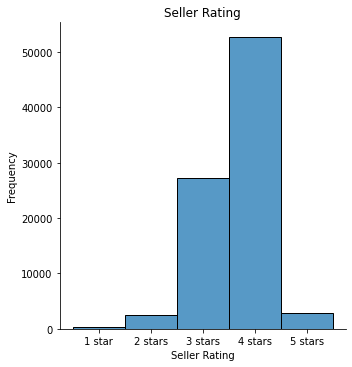

In [ ]:
# plotting the column
plt.figure(figsize=(10,6))
sns.displot(cars_df2['seller_rating'], bins=5)
plt.title('Seller Rating')
plt.xlabel('Seller Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking the number of null values in the column
percentage = cars_df2['torque'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the torque column are {percentage.round(2)}%.")

The amount of null values in the torque column are 16.16%.


In [ ]:
# checking the value_counts of the column
cars_df2['torque'].value_counts()/cars_df2.shape[0]*100

132 lb-ft @ 4,500 RPM   1.844
383 lb-ft @ 4,100 RPM   1.814
175 lb-ft @ 4,400 RPM   1.788
390 lb-ft @ 4,250 RPM   1.740
400 lb-ft @ 4,500 RPM   1.645
                         ... 
180 lb-ft @ 5,200 RPM   0.001
116 lb-ft @ 1,500 RPM   0.001
344 lb-ft @ 4,100 RPM   0.001
252 lb-ft @ 2,800 RPM   0.001
465 lb-ft @ 1,700 RPM   0.001
Name: torque, Length: 1021, dtype: float64

In [ ]:
# splitting the column and returning the first value
cars_df2['torque'] = cars_df2['torque'].str.split(" ").str[0]

# converting the column to float.
cars_df2['torque'] = cars_df2['torque'].astype(float)

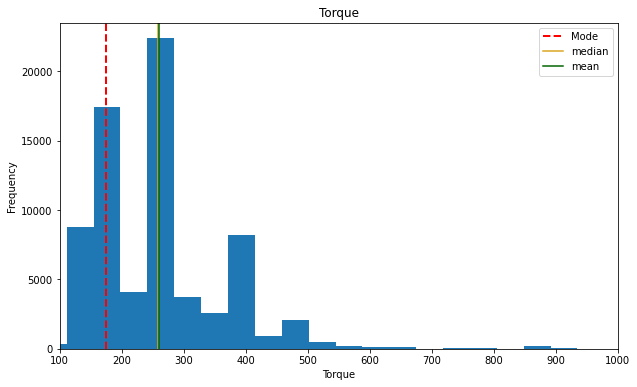

In [ ]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['torque'], bins=20)
plt.title('Torque')
# Add the mode
plt.axvline(cars_df2['torque'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['torque'].median(), color='goldenrod', label='median')
# Add the mean
plt.xlim(100,1000)
plt.axvline(cars_df2['torque'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# filling the null values with the mean of the column.
cars_df2['torque'].fillna(cars_df2['torque'].mean(), inplace=True)

# checking the result
result = cars_df2['torque'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the torque column are {result.round(2)}%.")

The amount of null values in the torque column are 0.0%.


In [ ]:
# checking how many null values are in the column
percentage = cars_df2['transmission'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the transmission column are {percentage.round(2)}%.")

The amount of null values in the transmission column are 1.04%.


In [ ]:
# checking the value_counts of the column
cars_df2['transmission'].value_counts()/cars_df2.shape[0]*100

A             82.751
CVT           14.374
M              1.475
Dual Clutch    0.364
Name: transmission, dtype: float64

In [ ]:
# checking for unique values in the column
cars_df2['transmission'].unique()

array(['A', 'CVT', 'M', nan, 'Dual Clutch'], dtype=object)

In [ ]:
# filling the null values with "A", for Automatic transmission.
cars_df2['transmission'].fillna("A", inplace=True)

# checking the result
result = cars_df2['transmission'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the transmission column are {result.round(2)}%.")

The amount of null values in the transmission column are 0.0%.


In [ ]:
# dropping the transmission_display
cars_df2.drop(['transmission_display'], axis=1, inplace=True)

In [ ]:
# checking the number of null values in the column
percentage = cars_df2['wheel_system'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheel_system column are {percentage}%.")

The amount of null values in the wheel_system column are 4.781387325010782%.


In [ ]:
# checking the value_counts of the column
cars_df2['wheel_system'].value_counts()/cars_df2.shape[0]*100

AWD   46.724
FWD   26.244
4WD   18.246
RWD    3.666
4X2    0.339
Name: wheel_system, dtype: float64

In [ ]:
# checking the unique values of the column
cars_df2['wheel_system'].unique()

array(['FWD', 'AWD', 'RWD', '4WD', nan, '4X2'], dtype=object)

In [ ]:
# replacing the null values with "FWD".
cars_df2['wheel_system'].fillna("FWD", inplace=True)

# checking the result
result = cars_df2['wheel_system'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheel_system column are {result.round(2)}%.")

The amount of null values in the wheel_system column are 0.0%.


In [ ]:
# checking how many null values are remaining in the dataset
cars_df2.isna().sum()

vin                     0
body_type               0
daysonmarket            0
engine_type             0
exterior_color          0
frame_damaged       40042
fuel_tank_volume        0
fuel_type               0
has_accidents       40042
horsepower              0
is_new                  0
major_options        5441
make_name               0
maximum_seating         0
mileage                 0
model_name              0
owner_count         42392
price                   0
seller_rating           0
torque                  0
transmission            0
wheel_system            0
year                    0
dtype: int64

In [ ]:
#dropping the columns with large number of null values
cars_df2 = cars_df2.drop(['frame_damaged', 'owner_count', 'has_accidents', 'major_options'], axis=1)

In [ ]:
# checking for non-numerical columns
cars_df2.select_dtypes(exclude=np.number).columns

Index(['vin', 'body_type', 'engine_type', 'exterior_color', 'fuel_type',
       'is_new', 'make_name', 'model_name', 'seller_rating', 'transmission',
       'wheel_system'],
      dtype='object')

In [ ]:
# dropping the column, redundant with mileage
cars_df2.drop(['is_new'], axis=1, inplace=True)

In [ ]:
# checking the value_counts of the column
top_20 = cars_df2['make_name'].value_counts()
top_20

Ford             12877
Chevrolet         7403
Toyota            5539
Jeep              5326
Nissan            5041
Honda             4979
BMW               4770
Hyundai           4371
Mercedes-Benz     3886
Kia               3681
Subaru            2668
Volkswagen        2164
Lincoln           2016
Audi              1872
RAM               1732
Lexus             1663
GMC               1575
Mazda             1567
Dodge             1561
Cadillac          1528
Volvo             1346
Acura             1219
Land Rover        1203
INFINITI          1132
Buick              932
Chrysler           633
Mitsubishi         597
Jaguar             479
Porsche            435
MINI               372
Maserati           356
Alfa Romeo         306
Genesis            162
Bentley             64
FIAT                52
Tesla               48
Ferrari             45
Scion               33
Rolls-Royce         31
Aston Martin        26
Pontiac             19
Lamborghini         14
smart               13
Lotus      

In [ ]:
# checking the number of unique values in the column
cars_df2['make_name'].nunique()

55

In [ ]:
# creating a list of the top 20 makes
top_20 = top_20[:20].index

# creating a function to return the top 20 makes
def top_20_make(make):
    if make in top_20:
        return make
    else:
        return 'Other'

# applying the function to the column
cars_df2['make_name'] = cars_df2['make_name'].apply(top_20_make)

# checking the result
cars_df2['make_name'].value_counts()

Ford             12877
Other             9572
Chevrolet         7403
Toyota            5539
Jeep              5326
Nissan            5041
Honda             4979
BMW               4770
Hyundai           4371
Mercedes-Benz     3886
Kia               3681
Subaru            2668
Volkswagen        2164
Lincoln           2016
Audi              1872
RAM               1732
Lexus             1663
GMC               1575
Mazda             1567
Dodge             1561
Cadillac          1528
Name: make_name, dtype: int64

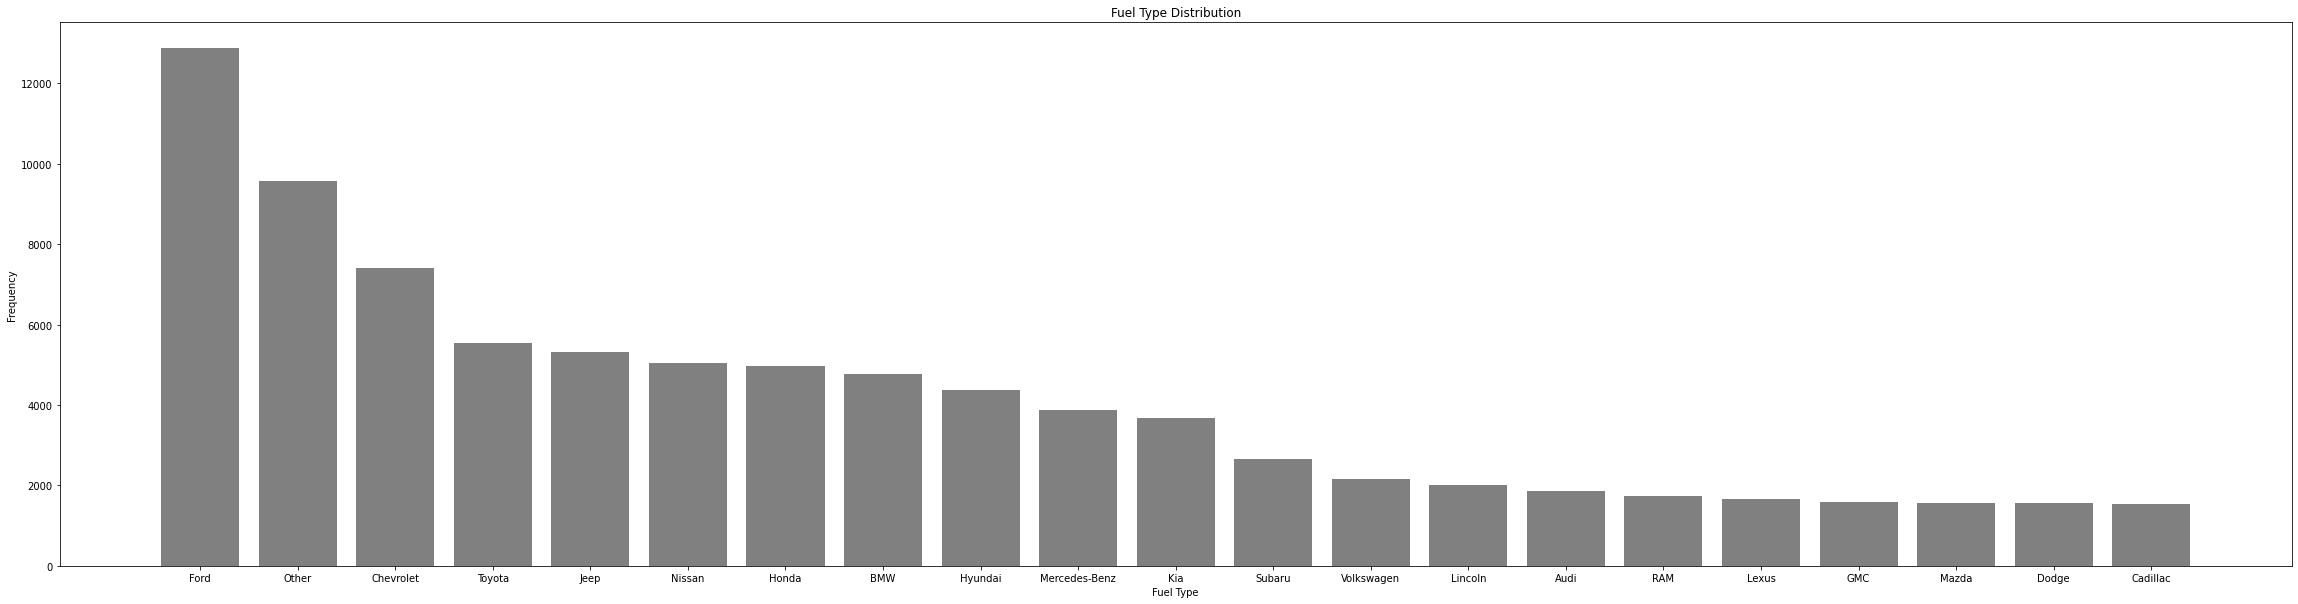

In [ ]:
plt.figure(figsize=(40,10))
plt.bar(cars_df2['make_name'].value_counts().index, cars_df2['make_name'].value_counts(),
        color=['grey'])
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# checking the value_counts of the column
cars_df2['model_name'].value_counts()

F-150             2440
Grand Cherokee    2117
Equinox           1861
Fusion            1830
Escape            1766
                  ... 
A4 Avant             1
500L                 1
Tiburon              1
Galant               1
RX-7                 1
Name: model_name, Length: 738, dtype: int64

In [ ]:
# checking the number of unique values in the column
cars_df2['model_name'].nunique()

738

In [ ]:
# instantiating the value counts
top_20 = cars_df2['model_name'].value_counts()

# creating a list of the top 20 models
top_20 = top_20[:20].index

# creating a function to return the top 20 models
def top_20_model(model):
    if model in top_20:
        return model
    else:
        return 'Other'

# applying the function to the column
cars_df2['model_name'] = cars_df2['model_name'].apply(top_20_model)

In [ ]:
# checking the result
cars_df2['model_name'].value_counts()

Other             58413
F-150              2440
Grand Cherokee     2117
Equinox            1861
Fusion             1830
Escape             1766
Explorer           1742
Rogue              1526
1500               1275
RAV4               1255
Accord             1188
Tucson             1165
CR-V               1123
Compass            1077
Edge               1065
Silverado 1500     1059
Sportage           1023
Trax               1001
3 Series            993
Altima              955
Camry               917
Name: model_name, dtype: int64

In [ ]:
#checking price distrubution
cars_df2['price'].describe()

count     85791.000
mean      32896.514
std       20928.845
min        1850.000
25%       20499.000
50%       28730.000
75%       40509.500
max     1390000.000
Name: price, dtype: float64

In [ ]:
# checking the value_counts of the column
cars_df2['price'].value_counts()

19995.000    339
16995.000    318
15995.000    311
17995.000    286
18995.000    274
            ... 
30485.000      1
19883.000      1
27515.000      1
36859.000      1
52498.000      1
Name: price, Length: 26008, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


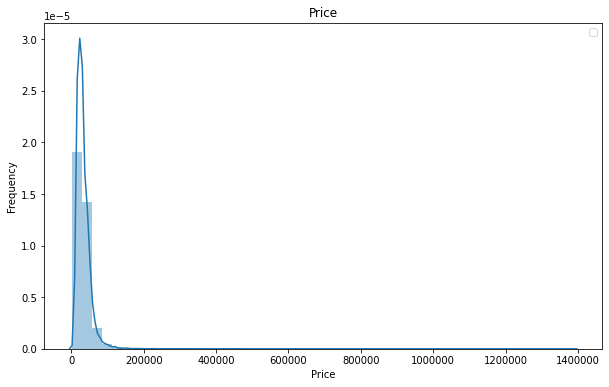

In [ ]:
# plotting a histogram of the column to check outliers
plt.figure(figsize=(10,6))
sns.distplot(cars_df2['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


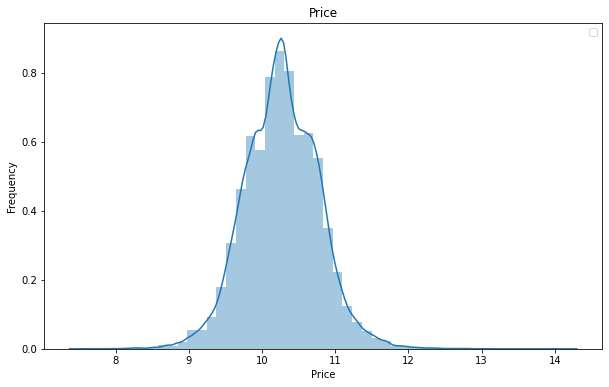

In [ ]:
# normalizing the price column
cars_df2['price'] = np.log(cars_df2['price'])

# plotting the distribution of the price column
plt.figure(figsize=(10,6))
sns.distplot(cars_df2['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [ ]:
# saving the dataset
cars_df2.to_csv('cleaned_dataset.csv', index=True)

In [ ]:
# checking the shape of the dataset
cars_df2.shape

(85791, 18)

In [ ]:
# importing the dataset
cars_df2 = pd.read_csv('cleaned_dataset.csv', index_col='vin')

# checking the shape of the dataset

In [ ]:
# checking how many categorical columns are in the dataframe
cars_df2.select_dtypes(include='object').nunique()

body_type          9
engine_type       16
exterior_color     8
fuel_type          7
make_name         21
model_name        21
seller_rating      5
transmission       4
wheel_system       5
dtype: int64

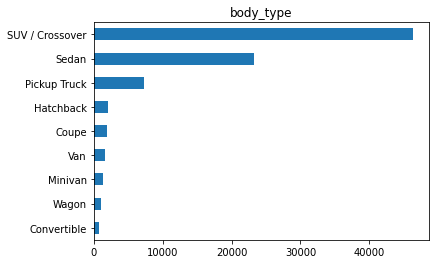

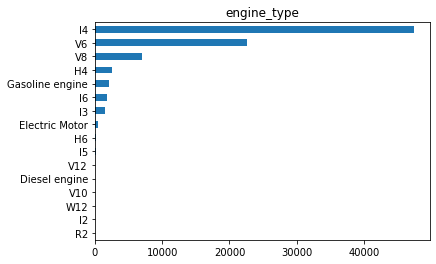

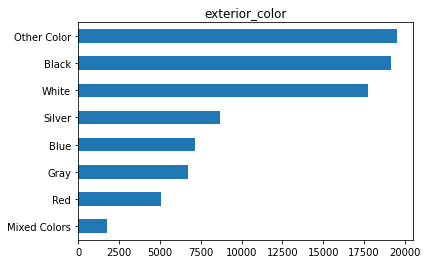

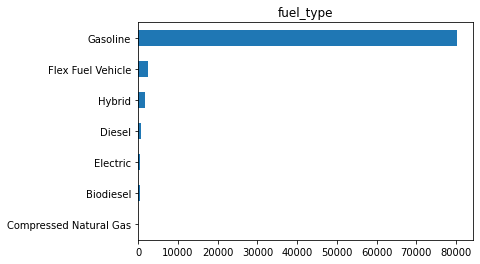

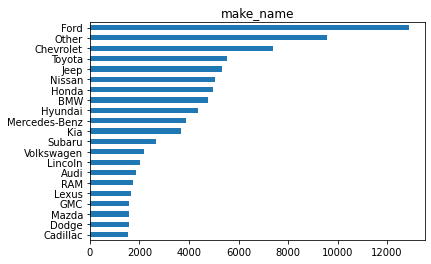

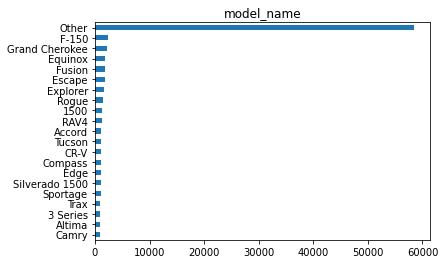

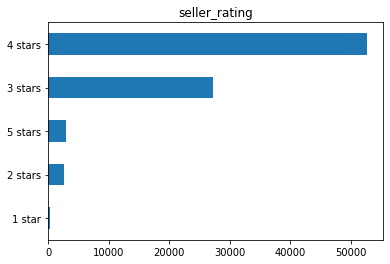

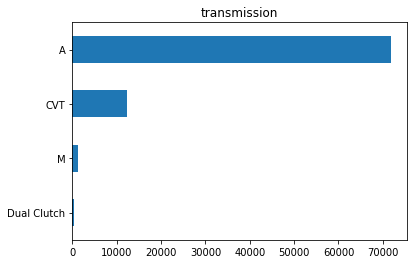

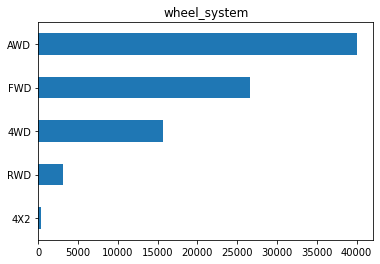

In [ ]:
# Pull out the categorical variables
categorical_df = cars_df2.select_dtypes('object')

# Iterate column by column
for column in categorical_df:

    # Do Something
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.title(column)
    plt.show()

In [ ]:
# checking how many numerical columns are in the dataframe
cars_df2.select_dtypes(exclude='object').nunique()

Unnamed: 0          85791
daysonmarket          795
fuel_tank_volume      162
horsepower            370
maximum_seating        11
mileage             33691
price               26008
torque                330
year                   64
dtype: int64

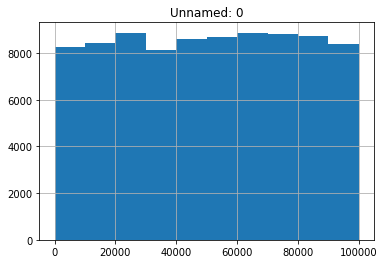

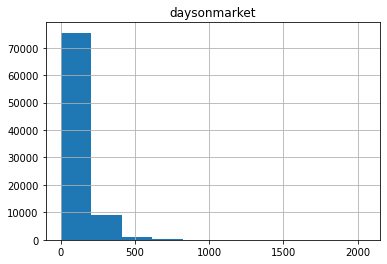

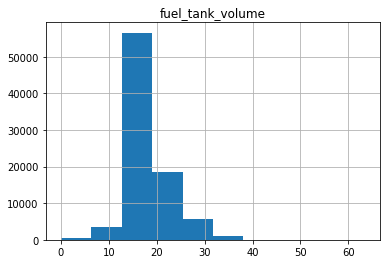

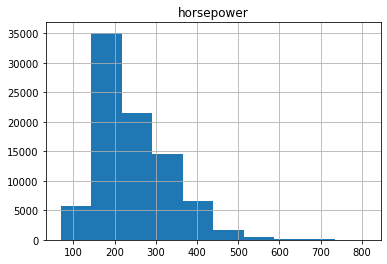

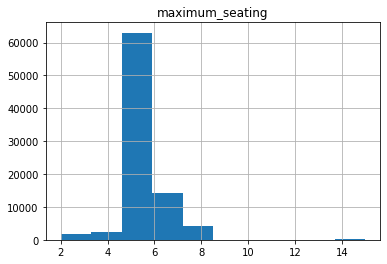

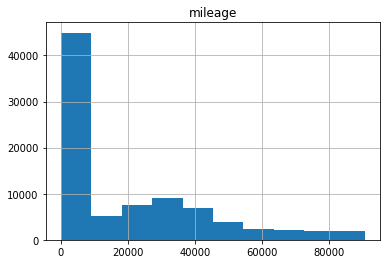

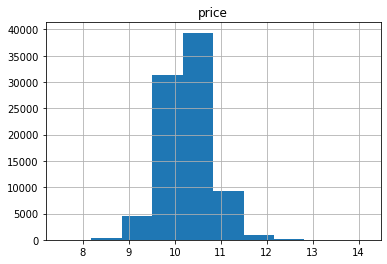

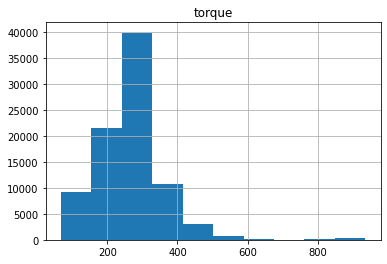

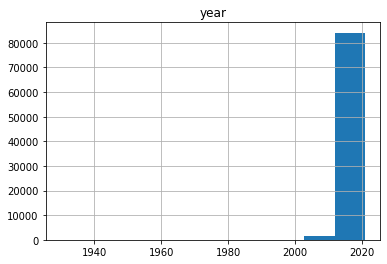

In [ ]:
# Pull out the categorical variables
numerical_df = cars_df2.select_dtypes(['float', 'int64'])

# Iterate column by column
for column in numerical_df:

    # Do Something
    numerical_df[column].hist()
    plt.title(column)
    plt.show()

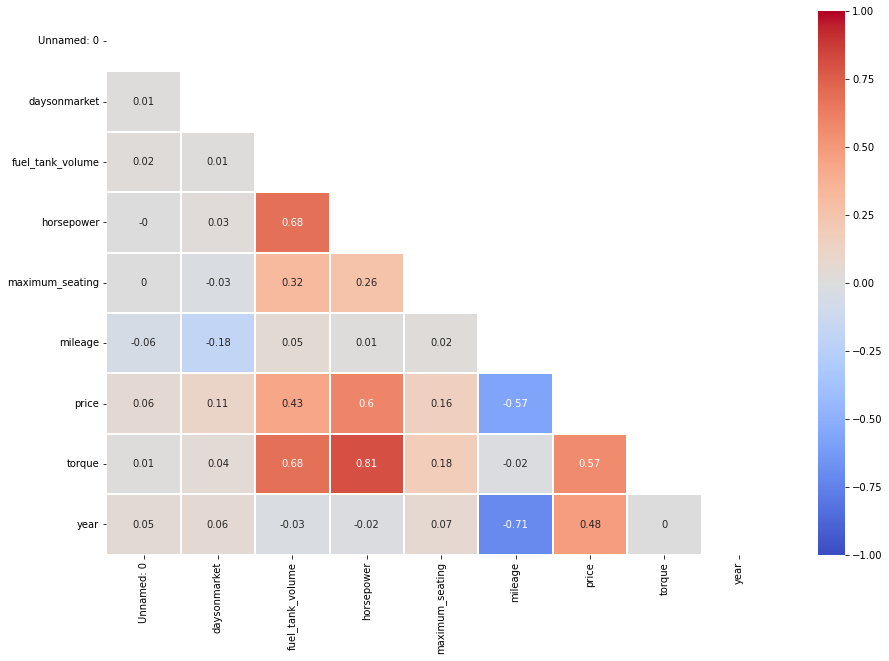

In [ ]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1,
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()

In [ ]:
cat_col = cars_df2.select_dtypes(include='object').columns

cat_col

Index(['body_type', 'engine_type', 'exterior_color', 'fuel_type', 'make_name',
       'model_name', 'seller_rating', 'transmission', 'wheel_system'],
      dtype='object')

In [ ]:
# looping through the categorical columns and using get_dummies to create dummy variables
for col in cat_col:
    dummies = pd.get_dummies(cars_df2[col], prefix=col, drop_first=True)
    cars_df2 = pd.concat([cars_df2, dummies], axis=1)
    cars_df2.drop(col, axis=1, inplace=True)

# checking the result
cars_df2.head()

,Unnamed: 0,daysonmarket,fuel_tank_volume,horsepower,maximum_seating,mileage,price,torque,year,body_type_Coupe,...,seller_rating_3 stars,seller_rating_4 stars,seller_rating_5 stars,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,0,522,12.700,177.000,5,7.000,10.049,200.000,2019,0,...,0,0,0,0,0,0,0,0,1,0
SALCJ2FX1LH858117,1,207,17.700,246.000,7,8.000,10.747,269.000,2020,0,...,1,0,0,0,0,0,0,1,0,0
SALRR2RV0L2433391,3,196,23.500,340.000,7,11.000,11.119,332.000,2020,0,...,1,0,0,0,0,0,0,1,0,0
SALCJ2FXXLH862327,4,137,17.700,246.000,7,7.000,10.797,269.000,2020,0,...,1,0,0,0,0,0,0,1,0,0
SALYK2EX1LA261711,5,242,16.600,247.000,5,12.000,11.111,269.000,2020,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# checking the correlation between the price and the other variables
matrix = pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')
matrix

,price
price,1.000000
horsepower,0.599329
torque,0.571466
year,0.477436
fuel_tank_volume,0.428961
engine_type_V8,0.267012
body_type_Pickup Truck,0.213883
engine_type_V6,0.197800
wheel_system_AWD,0.167138
maximum_seating,0.158676


In [ ]:
cars_df2.shape

(85791, 96)

In [ ]:
# making a list of the columns that have a correlation between 0.05 and -0.05 with the price column
columns_to_drop = []

for col in cars_df2.columns:
    if cars_df2[col].corr(cars_df2['price']) < 0.05 and cars_df2[col].corr(cars_df2['price']) > -0.05:
       columns_to_drop.append(col)

# checking the list
columns_to_drop

['body_type_Minivan',
 'body_type_Van',
 'engine_type_Electric Motor',
 'engine_type_I2',
 'engine_type_I3',
 'engine_type_R2',
 'engine_type_W12',
 'exterior_color_Blue',
 'exterior_color_Gray',
 'exterior_color_Mixed Colors',
 'exterior_color_Other Color',
 'exterior_color_Red',
 'exterior_color_White',
 'fuel_type_Compressed Natural Gas',
 'fuel_type_Diesel',
 'fuel_type_Electric',
 'fuel_type_Flex Fuel Vehicle',
 'fuel_type_Gasoline',
 'fuel_type_Hybrid',
 'make_name_Dodge',
 'make_name_GMC',
 'make_name_Jeep',
 'model_name_3 Series',
 'model_name_CR-V',
 'model_name_Compass',
 'model_name_Edge',
 'model_name_Escape',
 'model_name_Sportage',
 'model_name_Tucson',
 'seller_rating_5 stars',
 'transmission_Dual Clutch',
 'transmission_M',
 'wheel_system_4X2',
 'wheel_system_RWD']

In [ ]:
# dropping the columns
cars_df2.drop(columns_to_drop, axis=1, inplace=True)

# checking the result
cars_df2.shape

(85791, 62)

In [ ]:
# checking the correlation between the price and the other variables
pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')

,price
price,1.000000
horsepower,0.599329
torque,0.571466
year,0.477436
fuel_tank_volume,0.428961
engine_type_V8,0.267012
body_type_Pickup Truck,0.213883
engine_type_V6,0.197800
wheel_system_AWD,0.167138
maximum_seating,0.158676


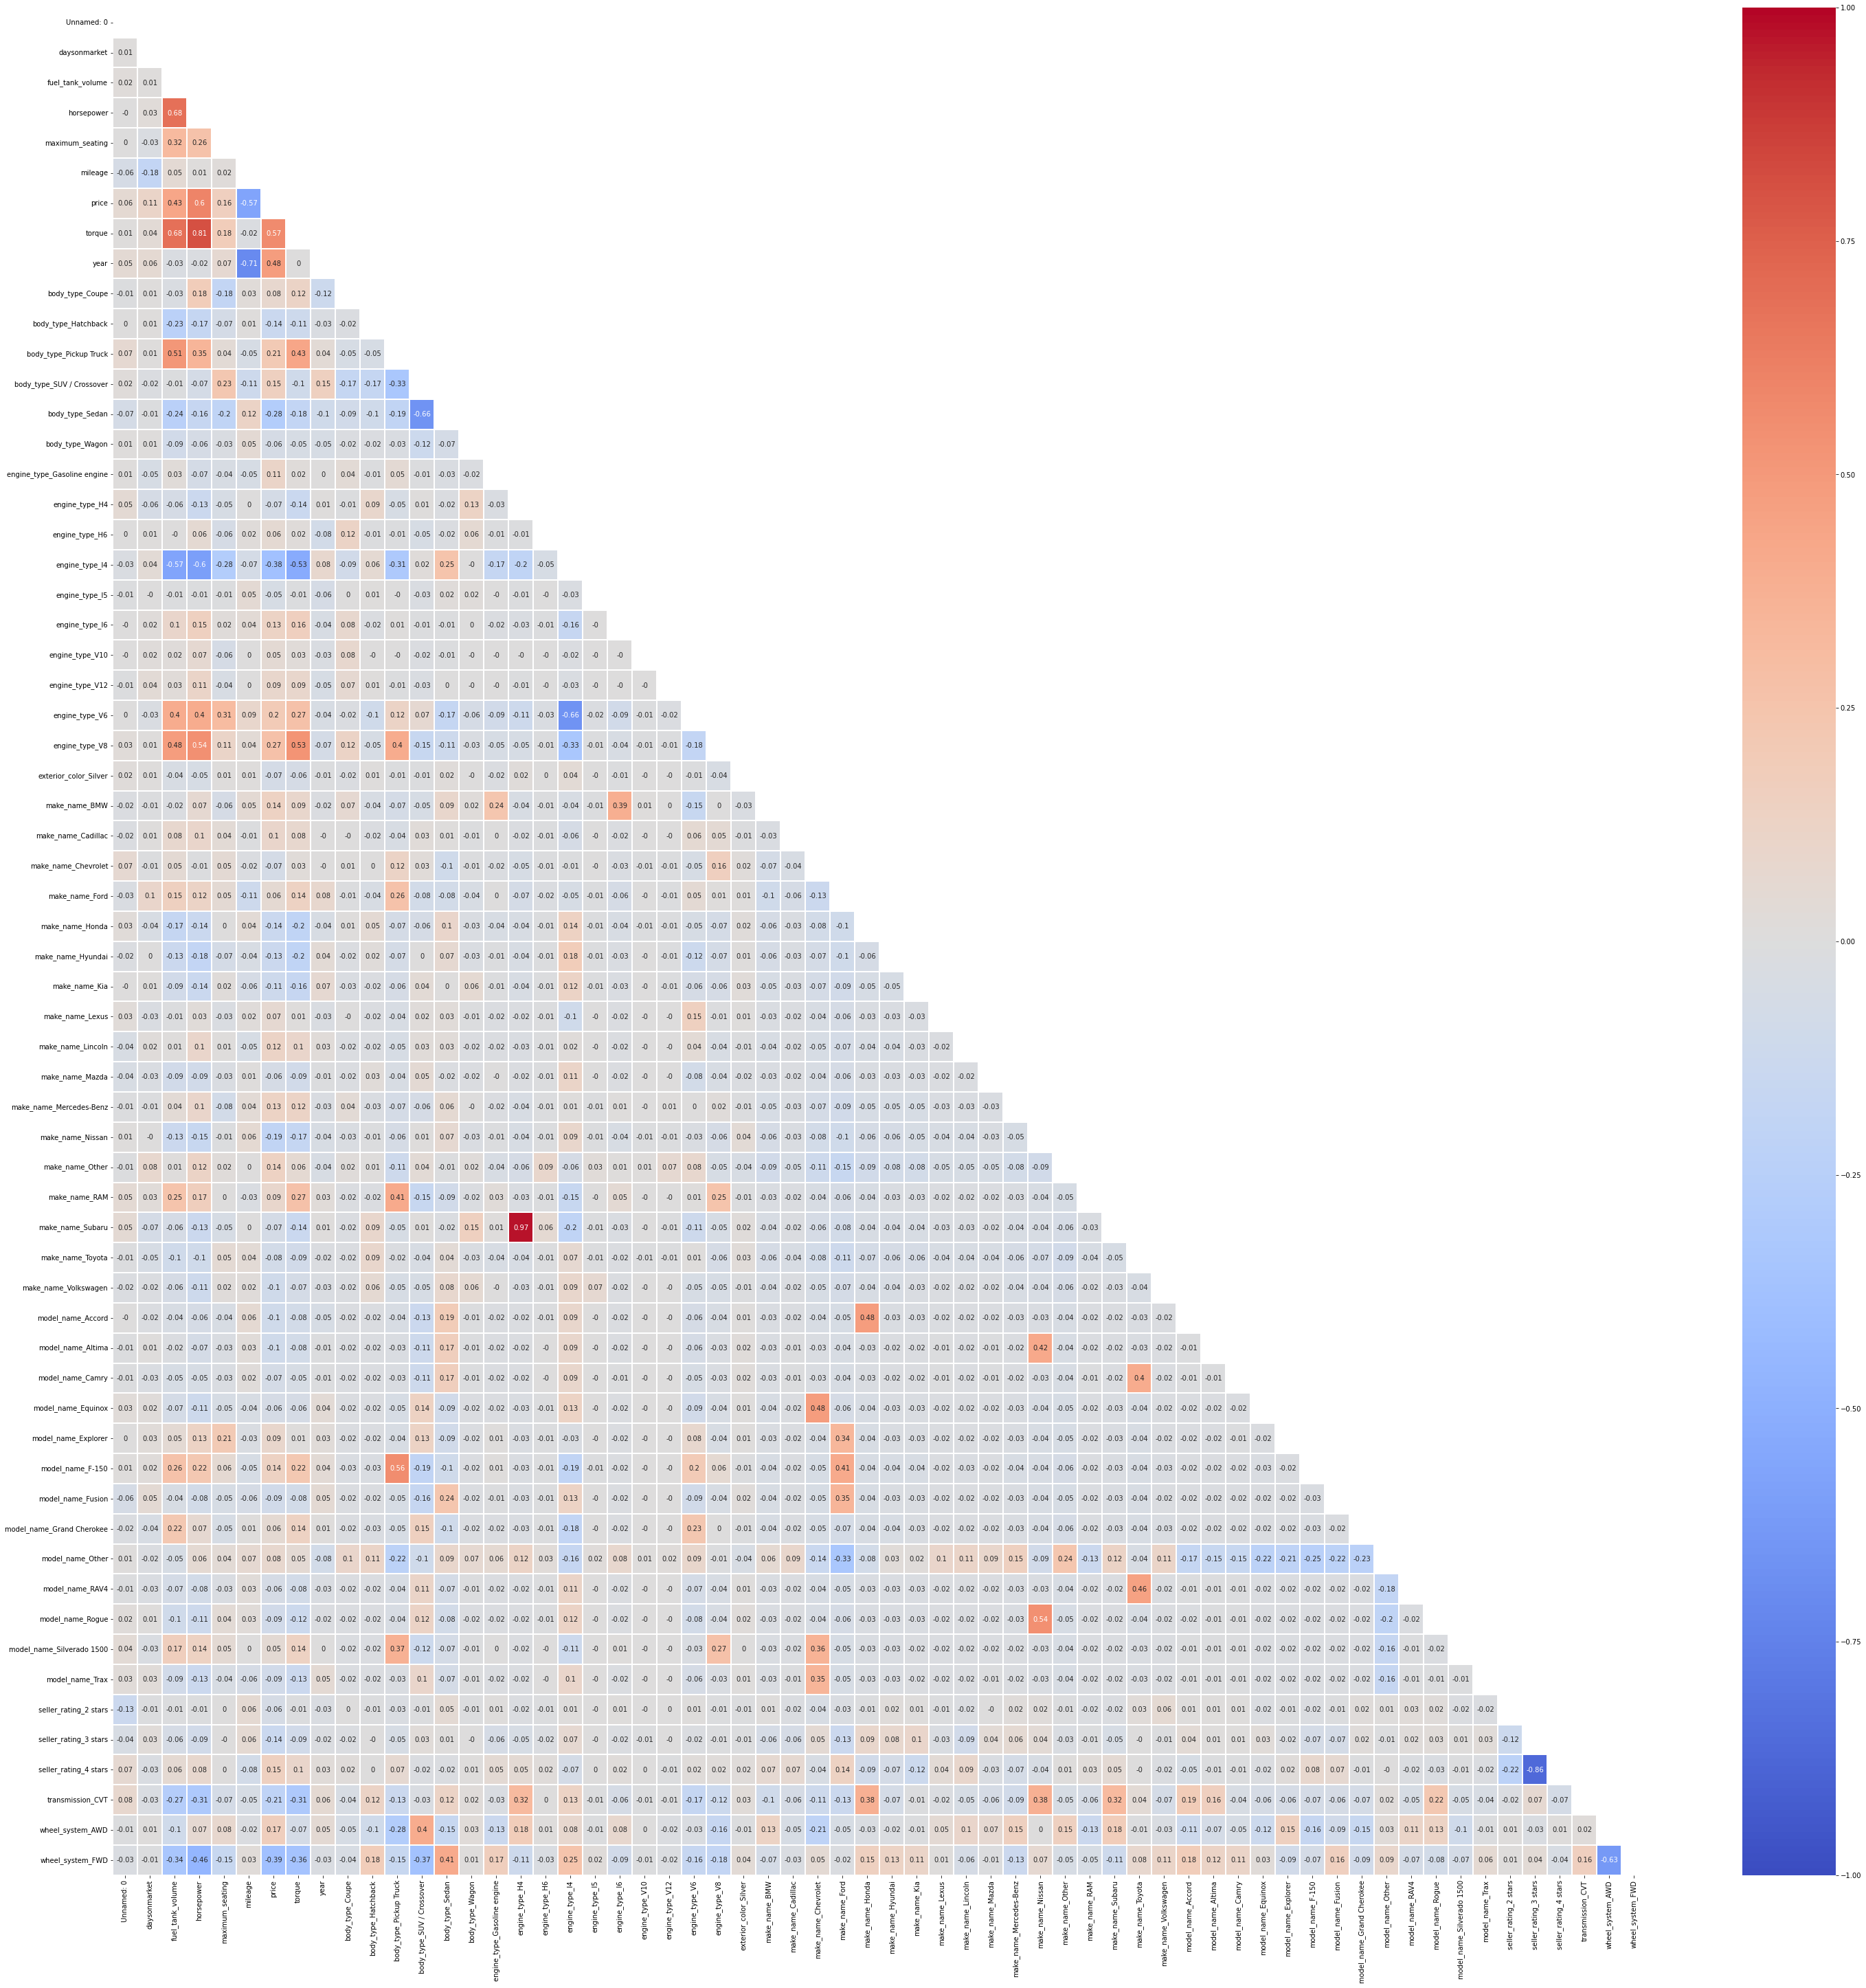

In [ ]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(50, 50))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1,
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()


In [ ]:
# Exporting the dataframe to a csv file
cars_df2.to_csv("cars_cleaned.csv")

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Importing the data
df = pd.read_csv("cars_cleaned.csv", index_col='vin')

In [ ]:
df.sample(5)

,Unnamed: 0,daysonmarket,fuel_tank_volume,horsepower,maximum_seating,mileage,price,torque,year,body_type_Coupe,...,model_name_RAV4,model_name_Rogue,model_name_Silverado 1500,model_name_Trax,seller_rating_2 stars,seller_rating_3 stars,seller_rating_4 stars,transmission_CVT,wheel_system_AWD,wheel_system_FWD
vin,,,,,,,,,,,,,,,,,,,,,
4T1D21FB8LU015400,72954,273,13.200,215.000,5,8.000,10.658,259.573,2020,0,...,0,0,0,0,0,1,0,1,0,1
JM3TCBDY4M0502751,51738,5,17.967,170.000,5,0.000,10.694,259.573,2021,0,...,0,0,0,0,0,0,1,0,0,1
KL4CJESB4KB728508,4660,47,14.000,138.000,5,5226.000,9.798,148.000,2019,0,...,0,0,0,0,0,0,1,0,1,0
2FMPK4J96JBB04369,83920,61,18.500,245.000,5,19019.000,10.196,250.000,2018,0,...,0,0,0,0,0,0,1,0,1,0
5N1AZ2DS9LN165419,56659,12,19.000,260.000,5,0.000,10.779,240.000,2020,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.shape

(85791, 62)

In [ ]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']

 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # setting random_state to get the same sample every time

In [ ]:
# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# importing the necessary libraries
from sklearn.linear_model import LinearRegression

# instantiating the model
lr = LinearRegression()

# fitting the model to the training data
lr.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred = lr.predict(X_test_scaled)

# scoring the train and test set
print(f'Train score: {lr.score(X_train_scaled, y_train)}')
print(f'Test score: {lr.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.8197662880289064
Test score: 0.8148574815265464
MSE: 0.046636167466444035
RMSE: 0.21595408647776043
MAE: 0.15560868616722032


In [ ]:
# instantiating the model with the best parameters
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

# fitting the model to the training data
lr.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred = lr.predict(X_test_scaled)

# scoring the train and test set
print(f'Train score: {lr.score(X_train_scaled, y_train)}')
print(f'Test score: {lr.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.8197662880289064
Test score: 0.8148574815265462
MSE: 0.04663616746644405
RMSE: 0.2159540864777605
MAE: 0.15560868616722032


In [ ]:
# importing the necessary libraries for KNN
from sklearn.neighbors import KNeighborsRegressor

# instantiating the model
knn = KNeighborsRegressor(n_jobs=-1)

# fitting the model to the training data
knn.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred = knn.predict(X_test_scaled)

# scoring the train and test set
print(f'Train score: {knn.score(X_train_scaled, y_train)}')
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9361263824672635
Test score: 0.8964822382021682
MSE: 0.029498757623468225
RMSE: 0.1717520236371852
MAE: 0.10826134569326608


In [ ]:
# sampling 10% of the data
df_sample = df.sample(frac=0.1, random_state=1)

# splitting the data into train and test sets
X = df_sample.drop('price', axis=1)
y = df_sample['price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# importing the necessary libraries for KNN
from sklearn.neighbors import KNeighborsRegressor

# instantiating the model
knn = KNeighborsRegressor(n_jobs=-1)

# fitting the model to the training data
knn.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred = knn.predict(X_test_scaled)

# scoring the train and test set
print(f'Train score: {knn.score(X_train_scaled, y_train)}')
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.8451398836305433
Test score: 0.7745207255393515
MSE: 0.05935749602207364
RMSE: 0.24363393856783097
MAE: 0.16962923011211536


In [ ]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']

 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# importing the necessary libraries for KNN
from sklearn.neighbors import KNeighborsRegressor

# instantiating the model
knn = KNeighborsRegressor(n_jobs=-1)

# fitting the model to the training data
knn.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred = knn.predict(X_test_scaled)

# scoring the train and test set
print(f'Train score: {knn.score(X_train_scaled, y_train)}')
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9361934261111252
Test score: 0.8963606989045626
MSE: 0.026106049770977136
RMSE: 0.16157366670029227
MAE: 0.1022744764427789


In [ ]:
# sampling 10% of the data
df_sample = df.sample(frac=0.1, random_state=1)

# splitting the data into train and test sets
X = df_sample.drop('price', axis=1)
y = df_sample['price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=1)

# scaling the data
scaler = StandardScaler()

# fitting the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the validation data
X_val_scaled = scaler.transform(X_val)

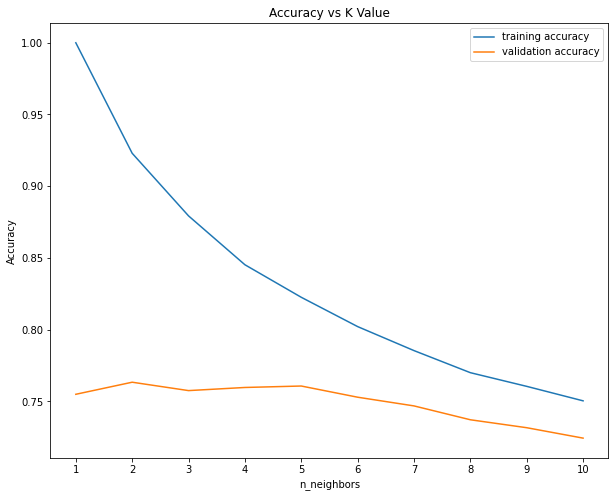

In [ ]:
# using the split set to find the optimal value for K in the KNN algorithm
training_accuracy = []
validation_accuracy = []

# list of K values to try
neighbors_settings = range(1, 11)

# looping through the K values on scaled data
for n_neighbors in neighbors_settings:
    # building the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=-1)
    knn.fit(X_train_scaled, y_train)

    # recording the training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train))

    # recording the generalization accuracy
    validation_accuracy.append(knn.score(X_val_scaled, y_val))

# plotting the training and validation accuracy
plt.figure(figsize=(10, 8))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, validation_accuracy, label='validation accuracy')
plt.title('Accuracy vs K Value')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.xticks(neighbors_settings)
plt.legend()
plt.show()

In [ ]:
# the optimal value for K
optimal_k = neighbors_settings[validation_accuracy.index(max(validation_accuracy))]
print('The optimal value for K is: ', optimal_k)

The optimal value for K is:  2


In [ ]:
# instantiating the model with the optimal K value
knn = KNeighborsRegressor(n_neighbors=optimal_k,
                          n_jobs=-1,
                          weights='distance',
                          algorithm='kd_tree',
                          leaf_size=30,
                          p=1)

# fitting the model to the training data
knn.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred = knn.predict(X_test_scaled)

# scoring the train and test set
print(f'Train score: {knn.score(X_train_scaled, y_train)}')
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 1.0
Test score: 0.7721562033059726
MSE: 0.05997995730769564
RMSE: 0.2449080588867905
MAE: 0.15516931390781988


In [ ]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']

 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
# importing the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# instantiating the model
rf = RandomForestRegressor(n_jobs=-1, random_state=1)

# fitting the model to the training data
rf.fit(X_train, y_train)

# predicting on the test set
y_pred = rf.predict(X_test)

# scoring the train and test set
print(f'Train score: {rf.score(X_train, y_train)}')
print(f'Test score: {rf.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9927962890574692
Test score: 0.9473183210832454
MSE: 0.01327016409106195
RMSE: 0.11519619824916945
MAE: 0.07044876516720258


In [ ]:
# finding the best parameters for the model
from sklearn.model_selection import GridSearchCV

# creating a dictionary of hyperparameters
params = {'n_estimators': [200, 300], 'max_depth': [20, 30], 'n_jobs': [-1]}

# instantiating the grid search
grid = GridSearchCV(rf, params, cv=5)

# fitting the grid search
grid.fit(X_train, y_train)

# printing the best parameters
print(grid.best_params_)

{'max_depth': 30, 'n_estimators': 300, 'n_jobs': -1}


In [ ]:
# instantiating the model with the best parameters
rf = RandomForestRegressor(max_depth=30,
                           n_estimators=300,
                           n_jobs=-1,
                           random_state=1)

# fitting the model to the training data
rf.fit(X_train, y_train)

# predicting on the test set
y_pred_rf = rf.predict(X_test)

# scoring the train and test set
print(f'Train score: {rf.score(X_train, y_train)}')
print(f'Test score: {rf.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred_rf)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred_rf))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred_rf))}')

Train score: 0.9926640808505995
Test score: 0.9438925047447201
MSE: 0.01594940725191944
RMSE: 0.12629096266922443
MAE: 0.0755644474388505


In [ ]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# splitting the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# importing the necessary libraries for Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# instantiating the model
model = Sequential()

# adding the input layer and the first hidden layer
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))

# adding hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# adding the output layer
model.add(Dense(1))

# compiling the model
model.compile(optimizer='adam', loss='mse') # mse is the mean squared error loss function for regression problems

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 59,649
Trainable params: 59,649
Non-traina

Epoch 1/100
429/429 [==============================] - 2s 4ms/step - loss: 3.5584 - val_loss: 0.0765
Epoch 2/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0514 - val_loss: 0.0436
Epoch 3/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0359 - val_loss: 0.0378
Epoch 4/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0305 - val_loss: 0.0332
Epoch 5/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0288 - val_loss: 0.0295
Epoch 6/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0283 - val_loss: 0.0295
Epoch 7/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0284 - val_loss: 0.0310
Epoch 8/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0276 - val_loss: 0.0405
Epoch 9/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0277 - val_loss: 0.0316
Epoch 10/100
429/429 [==============================] - 2s 4ms/step - loss: 0.0288 - val_lo

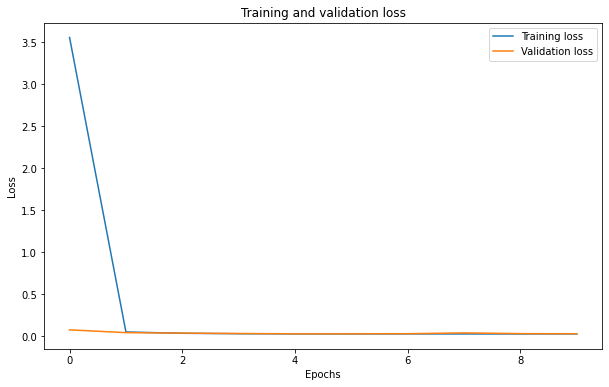

In [ ]:
# instantiating the early stopping callback
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=5,
                           restore_best_weights=True)

# fitting the model to the training data
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=1,
                    shuffle=True,
                    use_multiprocessing=True,
                    workers=4,
                    max_queue_size=10)

# plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_test, y_test, verbose=1)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

# predicting on the test set
y_pred = model.predict(X_test)

# calculating the r2 score on the test set
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

537/537 [==============================] - 1s 1ms/step - loss: 0.0282
Train Loss: 0.0288
Test Loss: 0.0282
537/537 [==============================] - 1s 995us/step
R2 Score: 0.8878
MSE: 0.02821876749443196
RMSE: 0.1679844263449203


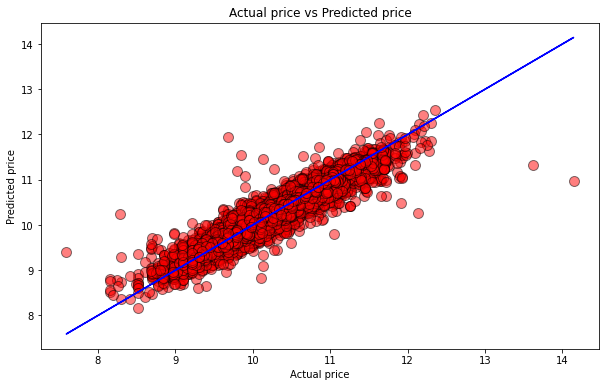

In [ ]:
# plotting the actual price vs the predicted price using the Neural Network model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred ,alpha=0.5, color='red', s=100,
            label='Predicted price', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=x
plt.plot(y_test, y_test, color='blue', label='Actual price')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

In [ ]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)

# predicting on the test set
y_pred = lgbm.predict(X_test)

# scoring the train and test set
print(f'Train score: {lgbm.score(X_train, y_train)}')
print(f'Test score: {lgbm.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')


Train score: 0.9332088540209973
Test score: 0.9244186232492151
MSE: 0.01900322215123214
RMSE: 0.13785217499637842
MAE: 0.09965866440162639


In [ ]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=32,
                         colsample_bytree=0.2,
                         reg_alpha=3,
                         reg_lambda=1,
                         min_split_gain=0.01,
                         min_child_weight=40,
                         random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)

# predicting on the test set
y_pred = lgbm.predict(X_test)

# scoring the train and test set
print(f'Train score: {lgbm.score(X_train, y_train)}')
print(f'Test score: {lgbm.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

Train score: 0.9374942693090219
Test score: 0.92879997800565
MSE: 0.017901629915959363
RMSE: 0.13379697274587105
MAE: 0.0941784940389778


In [ ]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor

# instantiating the model
xgb = XGBRegressor()

# fitting the model to the training data
xgb.fit(X_train, y_train)

# predicting on the test set
y_pred = xgb.predict(X_test)

# scoring the train and test set
print(f'Train score: {xgb.score(X_train, y_train)}')
print(f'Test score: {xgb.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')


[01:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.8825931968941088
Test score: 0.8772641742989165
MSE: 0.030859138348368002
RMSE: 0.17566769295567128
MAE: 0.1297073603246446


In [ ]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor

# instantiating the model
xgb = XGBRegressor(
    n_jobs=-1,
    learning_rate=0.2,
    max_depth=8,
    min_child_weight=3,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.9
    )

# fitting the model to the training data
xgb.fit(X_train, y_train)

# predicting on the test set
y_pred = xgb.predict(X_test)

# scoring the train and test set
print(f'Train score: {xgb.score(X_train, y_train)}')
print(f'Test score: {xgb.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

[01:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9972276126836332
Test score: 0.9535407714196489
MSE: 0.011681118810502692
RMSE: 0.10807922469421537
MAE: 0.06989956242062038


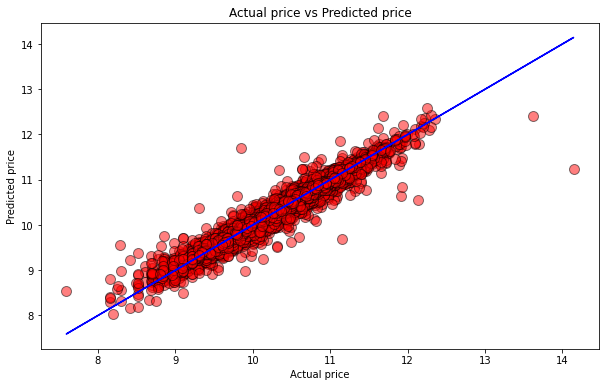

In [ ]:
# plotting the actual price vs the predicted price using the XGBoost model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb.predict(X_test),alpha=0.5, color='red', s=100,
            label='Predicted price', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=x
plt.plot(y_test, y_test, color='blue', label='Actual price')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

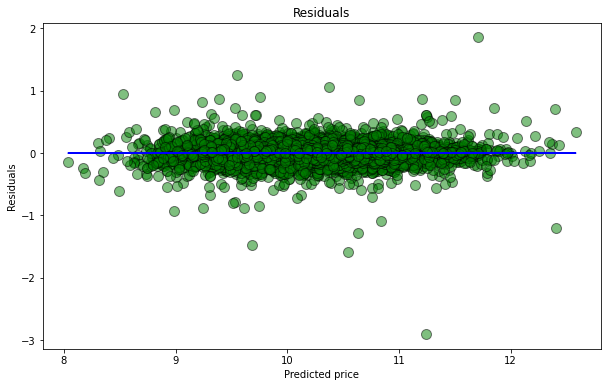

In [ ]:
# plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(xgb.predict(X_test), xgb.predict(X_test) - y_test, alpha=0.5, color='green', s=100,
            label='Residuals', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=0
plt.plot(xgb.predict(X_test), [0 for i in range(len(y_test))], color='blue', label='Residuals')
plt.xlabel('Predicted price')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.show()

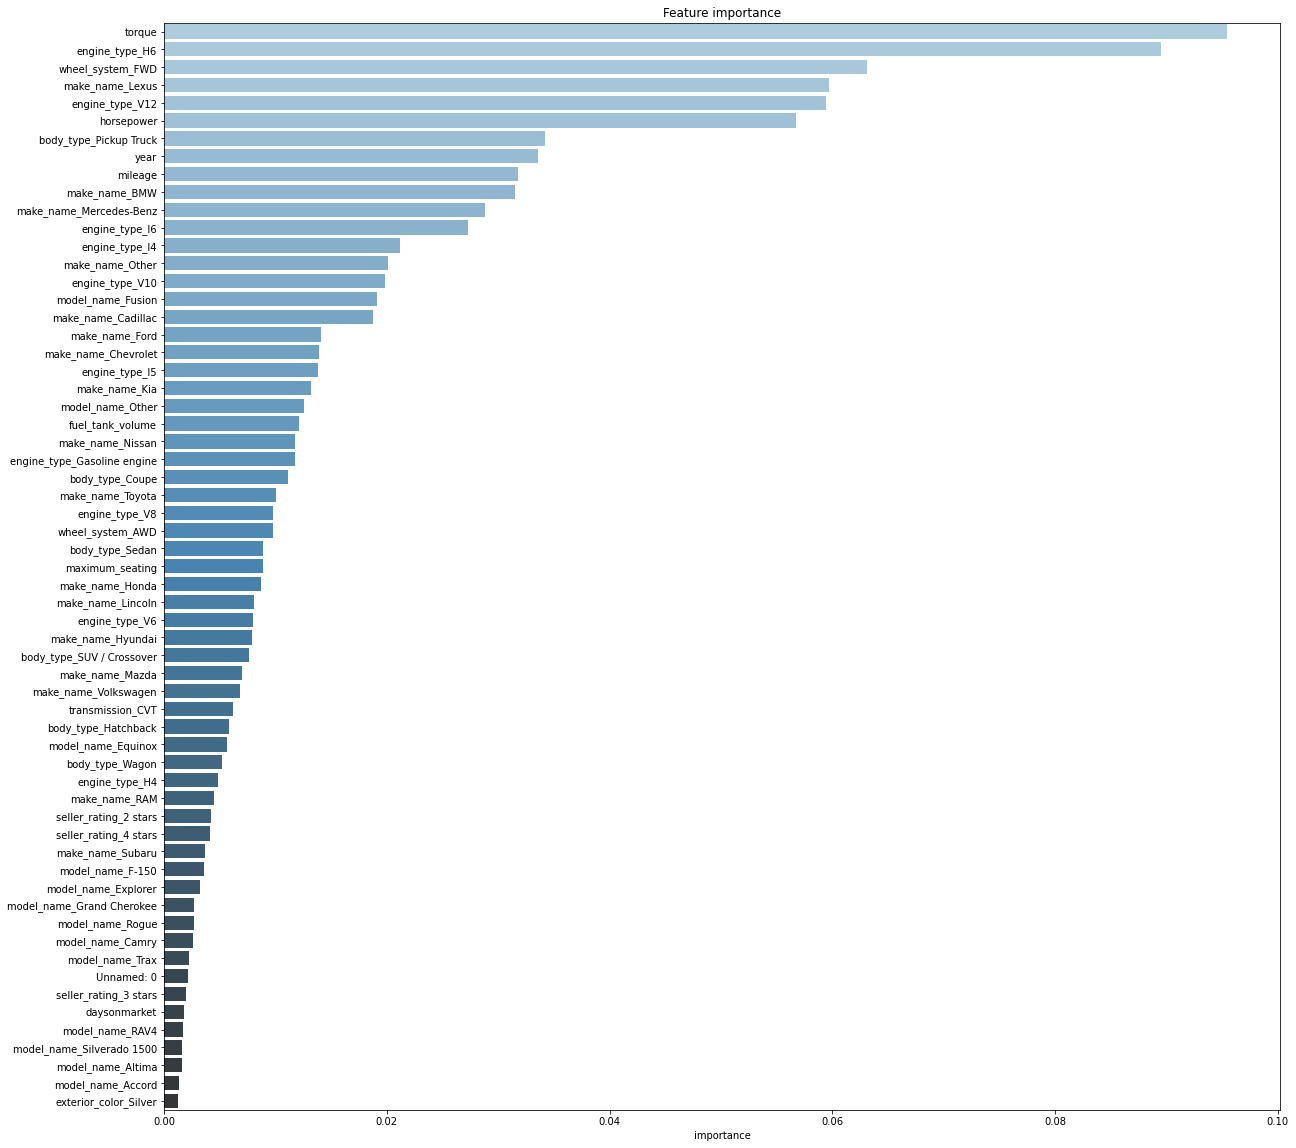

In [ ]:
# plotting the importance of the features in descending order
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(20,20))
sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='Blues_d')
plt.title('Feature importance')
plt.show()

In [ ]:
# making a list of the features that have an importance greater than 0.01
features = feature_importances[feature_importances.importance > 0.01].index.tolist()

# creating a new dataframe with the features that have an importance greater than 0.01
X = df[features]
y = df['price']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# splitting the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
# finding the best parameters for the XGBoost model
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# instantiating the XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=1)

# defining the parameters for the RandomizedSearchCV
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# instantiating the RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)

# fitting the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# printing the best parameters
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 1.0, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [ ]:
xgb = XGBRegressor(
    n_jobs=-1,
    learning_rate=0.3,
    max_depth=8,
    min_child_weight=3,
    n_estimators=500,
    subsample=0.7,
    colsample_bytree=0.9
    )

# fitting the XGBoost model to the training data
xgb.fit(X_train, y_train)

# predicting on the test set
y_pred = xgb.predict(X_test)

# scoring the train and test set
print(f'Train score: {xgb.score(X_train, y_train)}')
print(f'Test score: {xgb.score(X_test, y_test)}')

# calculating the MSE
print(f'MSE: {mse(y_test, y_pred)}')

# calculating the RMSE
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

# calculating the MAE
print(f'MAE: {np.mean(np.abs(y_test - y_pred))}')

[02:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9731720234027139
Test score: 0.9249248895540153
MSE: 0.018875932976684228
RMSE: 0.13738971204818878
MAE: 0.09582389951533413
